In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('netflix_titles.csv')
data

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
for i in data.columns:
    null_percent = data[i].isna().sum()/len(data) *100
    print("{} null rate: {}%".format(i,round(null_percent,2)))

show_id null rate: 0.0%
type null rate: 0.0%
title null rate: 0.0%
director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
release_year null rate: 0.0%
rating null rate: 0.05%
duration null rate: 0.03%
listed_in null rate: 0.0%
description null rate: 0.0%


In [7]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [9]:
data['country'].fillna(data['country'].mode()[0], inplace=True)
data['cast'].replace(np.nan, 'N.A', inplace=True)
data['director'].replace(np.nan, 'N.A', inplace=True)

In [10]:
data.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              N.A   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              N.A   
4      s5  TV Show           Kota Factory              N.A   

                                                cast        country  \
0                                                N.A  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                                N.A  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [12]:
data.dropna(inplace=True)
data.drop_duplicates(inplace= True)

In [13]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [14]:
rating_mapping = {
    'PG-13': 'Teens',
    'TV-MA': 'Adults',
    'PG': 'Kids',
    'TV-14': 'Teens',
    'TV-PG': 'Kids',
    'TV-Y': 'Kids',
    'TV-Y7': 'Kids',
    'R': 'Adults',
    'TV-G': 'Kids',
    'G': 'Kids',
    'NC-17': 'Adults',
    'NR': 'Adults',
    'UR': 'Adults',
    'TV-Y7-FV': 'Kids'
}
data['rating'] = data['rating'].replace(rating_mapping)

In [15]:
data.head(10)

show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                        director  \
0                Kirsten Johnson   
1                            N.A   
2                Julien Leclercq   
3                            N.A   
4                            N.A   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
8                Andy Devonshire   
9                 Theodore Melfi   

                                                cast  \
0                                                N.A   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                                N.A   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...   
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9  Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   

                                             country          date_added  \
0                                      United States  September 25, 2021   
1                                       South Africa  September 24, 2021   
2                                      United States  September 24, 2021   
3                                      United States  September 24, 2021   
4                                              India  September 24, 2021   
5                                      United States  September 24, 2021   
6                                      United States  September 24, 2021   
7  United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                     United Kingdom  September 24, 2021   
9                                      United States  September 24, 2021   

   release_year  rating   duration  \
0          2020   Teens     90 min   
1          2021  Adults  2 Seasons   
2          2021  Adults   1 Season   
3          2021  Adults   1 Season   
4          2021  Adults  2 Seasons   
5          2021  Adults   1 Season   
6          2021    Kids     91 min   
7          1993  Adults    125 min   
8          2021   Teens  9 Seasons   
9          2021   Teens    104 min   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   
5                 TV Dramas, TV Horror, TV Mysteries   
6                           Children & Family Movies   
7   Dramas, Independent Movies, International Movies   
8                       British TV Shows, Reality TV   
9                                   Comedies, Dramas   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...  
5  The arrival of a charismatic young priest brin...  
6  Equestria's divided. But a bright-eyed hero be...  
7  On a photo shoot in Ghana, an American model s...  
8  

In [17]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [20]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['month_added'] = data['date_added'].dt.month
data['year_added'] = data['date_added'].dt.year
data.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              N.A   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              N.A   
4      s5  TV Show           Kota Factory              N.A   

                                                cast        country  \
0                                                N.A  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                                N.A  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year  rating   duration  \
0 2021-09-25          2020   Teens     90 min   
1 2021-09-24          2021  Adults  2 Seasons   
2 2021-09-24          2021  Adults   1 Season   
3 2021-09-24          2021  Adults   1 Season   
4 2021-09-24          2021  Adults  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  month_added  year_added  
0  As her father nears the end of his life, filmm...          9.0      2021.0  
1  After crossing paths at a party, a Cape Town t...          9.0      2021.0  
2  To protect his family from a powerful drug lor...          9.0      2021.0  
3  Feuds, flirtations and toilet talk go down amo...          9.0      2021.0  
4  In a city of coaching centers known to train I...          9.0      2021.0

# Data Visualisation

In [22]:
import plotly.graph_objects as go
fig = go.Figure()
data_type = data['type'].value_counts().reset_index()
data_type.columns = ['type', 'total_type']
data_type['total_percentage'] = data_type['total_type'] / data_type['total_type'].sum()
data_type

type  total_type  total_percentage
0    Movie        6126          0.696928
1  TV Show        2664          0.303072

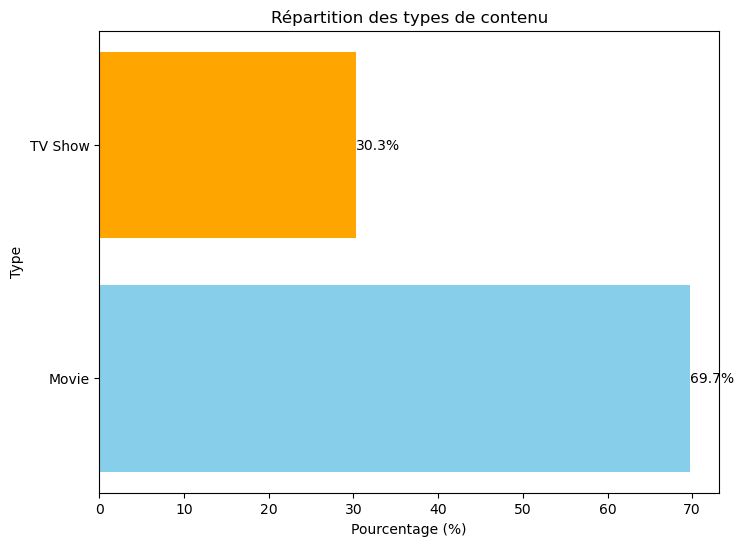

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.barh(data_type['type'], data_type['total_percentage'] * 100, color=['skyblue', 'orange'])
plt.xlabel('Pourcentage (%)')
plt.ylabel('Type')
plt.title('Répartition des types de contenu')
for index, value in enumerate(data_type['total_percentage']):
    plt.text(value * 100, index, f'{value:.1%}', va='center', fontsize=10)
plt.show()

In [28]:
data_rating = data['rating'].value_counts().reset_index()
data_rating.columns = ['rating', 'total_rating']
data_rating['total_percentage'] = data_rating['total_rating'] / data_rating['total_rating'].sum()
data_rating

rating  total_rating  total_percentage
0  Adults          4089          0.465188
1   Teens          2647          0.301138
2    Kids          2054          0.233675

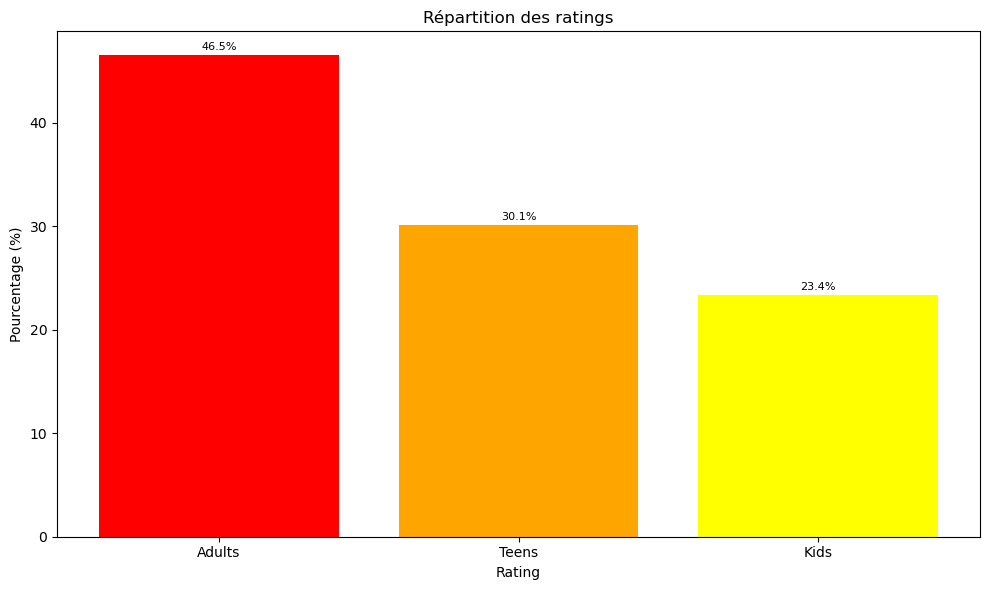

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(data_rating['rating'], data_rating['total_percentage'] * 100, color=['red','orange', 'yellow'])
plt.xlabel('Rating')
plt.ylabel('Pourcentage (%)')
plt.title('Répartition des ratings')
for index, value in enumerate(data_rating['total_percentage']):
    plt.text(index, value * 100 + 0.5, f'{value:.1%}', ha='center', fontsize=8)
plt.tight_layout()
plt.show()

In [54]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['rating_encoded'] = label_encoder.fit_transform(data['rating'])
data = pd.get_dummies(data, columns=['rating'], prefix='rating', drop_first=True)
data.head()

KeyError: 'rating'

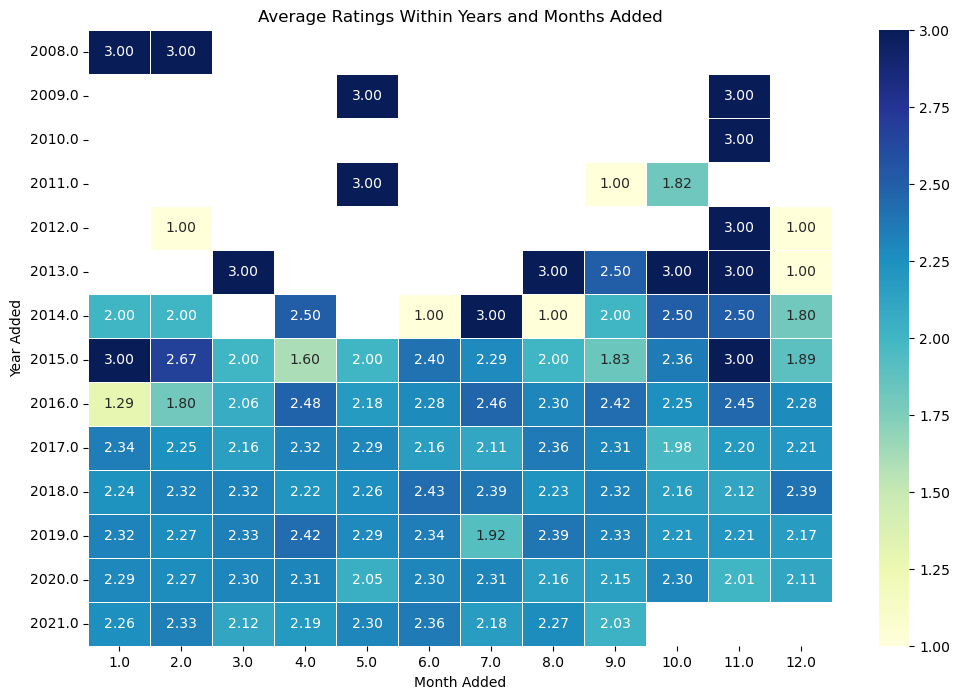

In [35]:
import seaborn as sns
rating_mapping = {
    'Kids': 1,
    'Teens': 2,
    'Adults': 3
}
data['rating_numeric'] = data['rating'].map(rating_mapping)
heatmap_data = data.groupby(['year_added', 'month_added'])['rating_numeric'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Ratings Within Years and Months Added')
plt.xlabel('Month Added')
plt.ylabel('Year Added')
plt.show()

# TF-IDF matrix

In [50]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['description'])
print(tfidf_matrix)

  (0, 8480)	0.33697542563754035
  (0, 6075)	0.2005182638308872
  (0, 7791)	0.1647247191398322
  (0, 18294)	0.22718433489295445
  (0, 3462)	0.31097332071953376
  (0, 8748)	0.31097332071953376
  (0, 4339)	0.18155356594240157
  (0, 15921)	0.2791885447289675
  (0, 9021)	0.31781276893706956
  (0, 9337)	0.35218568195439126
  (0, 6367)	0.22924979825084993
  (0, 9756)	0.12595593557049564
  (0, 5589)	0.22397613237994904
  (0, 11298)	0.30519064964697395
  (0, 6202)	0.162510187904644
  (1, 1936)	0.27203014687744764
  (1, 274)	0.29661513167244374
  (1, 15348)	0.2221061684685916
  (1, 15951)	0.20669988005607787
  (1, 16488)	0.3392337097494921
  (1, 14705)	0.17549360943648143
  (1, 12978)	0.2682500279001291
  (1, 13125)	0.24710590878570893
  (1, 14986)	0.21305266601679512
  (1, 16725)	0.19316059830356336
  :	:
  (8788, 18762)	0.3269049702561681
  (8788, 12884)	0.3016799339831618
  (8788, 6135)	0.27962141876410335
  (8788, 18045)	0.27354198071203184
  (8788, 10730)	0.23855427212010263
  (8788, 3196)	

In [51]:
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
print("Number of Non-Zero Elements:", tfidf_matrix.nnz)
print("Density of TF-IDF Matrix:", tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1]))

TF-IDF Matrix Shape: (8790, 18878)
Number of Non-Zero Elements: 121142
Density of TF-IDF Matrix: 0.0007300454230933287


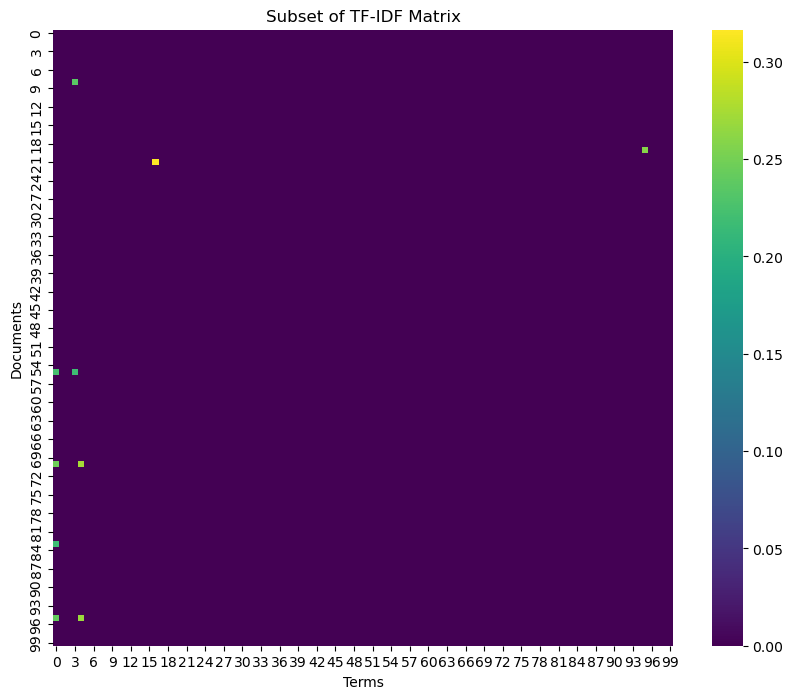

In [52]:
dense_tfidf_matrix = tfidf_matrix.todense()
subset_matrix = dense_tfidf_matrix[:100, :100]
plt.figure(figsize=(10, 8))
sns.heatmap(subset_matrix, cmap='viridis', annot=False)
plt.title('Subset of TF-IDF Matrix')
plt.xlabel('Terms')
plt.ylabel('Description')
plt.show()

# recommendation based on rating and year & month added

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [44]:
def recommend_last_added_shows(data, input_title, top_n=5):
    data['description'] = data['description'].str.lower()
    data = data.dropna(subset=['year_added', 'month_added'])
    latest_year = data['year_added'].max()
    latest_month = data[data['year_added'] == latest_year]['month_added'].max()
    data = data[(data['year_added'] == latest_year) & (data['month_added'] == latest_month)]
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(data['description'])
    cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)
    input_title_index = data[data['title'] == input_title].index
    if len(input_title_index) == 0:
        return "Cannot find matching shows."
    input_title_index = input_title_index[0]
    similar_shows = list(enumerate(cosine_similarities[input_title_index]))
    similar_shows = sorted(similar_shows, key=lambda x: x[1], reverse=True)
    top_similar_shows = similar_shows[1:top_n+1]
    result = {}
    for i, (index, similarity) in enumerate(top_similar_shows, 1):
        similar_show_title = data.iloc[index]['title']
        result[f"Recommendation #{i}"] = similar_show_title
    return result

In [45]:
input_title = 'Blood & Water'
recommendations = recommend_last_added_shows(data, input_title, top_n=5)
print(f"Recommendations based on '{input_title}':")
for key, value in recommendations.items():
    print(f"{key}: {value}")

Recommendations based on 'Blood & Water':
Recommendation #1: Go! Go! Cory Carson: Chrissy Takes the Wheel
Recommendation #2: Dive Club
Recommendation #3: Snervous Tyler Oakley
Recommendation #4: Yowamushi Pedal
Recommendation #5: Brave Animated Series
